In [89]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# show all rows and columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [53]:
path = 'C:\\Users\\Qamar\\OneDrive\Documents\\4 DEV\\_jupyter\\global_energy_consumption\\world.csv'
df = pd.read_csv(path)

In [187]:
# make all col names lower case
df.columns = [col.lower() for col in df.columns]
df = df.rename(columns={'density\\n(p/km2)': 'density'})

# drop rows with empty 'entity'
df = df.dropna()

In [57]:
# remove commas in values for 'density' col
df.density = df.density.astype('str')
df.density = df.density.str.replace(',','')
df.density.dropna()
# convert 'density' col to become a float type
df.density = df.density.astype(float)

In [59]:
# SPLIT DATA
y = df['electricity from renewables (twh)']

X_list = df.columns.drop(['electricity from renewables (twh)'])
X = df[X_list]

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

In [61]:
## CLEAN DATA: MISSING NUM VALUES WITH IMPUTATION
# create list of numerical cols
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64','float64']]

my_imputer = SimpleImputer()

imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train[num_cols]))
imputed_X_train.columns = X_train[num_cols].columns
imputed_X_val = pd.DataFrame(my_imputer.transform(X_val[num_cols]))
imputed_X_val.columns = X_val[num_cols].columns

In [63]:
# drop NaNs in y
y_train = y_train.dropna()
y_val = y_val.dropna()

In [100]:
n_estimators = [5, 50, 500, 5000]

def get_mae(imputed_X_train, y_train, imputed_X_val, y_val, n_estimators):
    # DEFINE MODEL
    model = RandomForestRegressor(n_estimators, random_state=0)
    model.fit(imputed_X_train, y_train)
    preds = model.predict(imputed_X_val)
    # MEASURE MODEL
    mae = mean_absolute_error(y_val, preds)

    return mae

In [101]:
mae_list = []
for n in range(len(n_estimators)):
    my_mae = get_mae(imputed_X_train, y_train, imputed_X_val, y_val, n_estimators[n])
    mae_list.append(my_mae)

print(mae_list)

[7.520906976744186, 9.418504651162781, 9.58102837209313, 9.523001186044796]


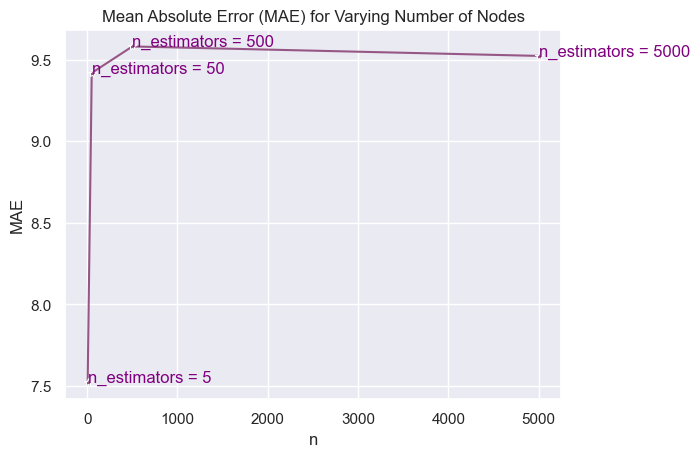

In [181]:
# FIND OUT THE BEST n_estimators
mae_df = pd.DataFrame(mae_list, index=None, columns=['MAE'])
n_estimators_df = pd.DataFrame(n_estimators, index=None, columns=['n'])

best_n_df = n_estimators_df.join(mae_df)
best_n_df

# plot line graph
sns.set_theme(style="darkgrid")
ax = sns.lineplot(x='n', y='MAE', data=best_n_df, marker='*', color='#965786')
ax.set(title='Mean Absolute Error (MAE) for Varying Number of Nodes')

# label points on the plot
for x, y in zip(best_n_df['n'], best_n_df['MAE']):
    # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
    plt.text(x = x,                         # x-coordinate position of data label
            y = y,                          # y-coordinate position of data label, adjusted to be 150 below the data point
            s = f'n_estimators = {x}',      # data label, formatted to ignore decimals
            color = 'purple')               # set colour of line

fig = ax.get_figure()
fig.savefig("get_mae.jpg") 

In [184]:
# FINAL PREDICTIONS
model = RandomForestRegressor(n_estimators=500, random_state=0)
model.fit(imputed_X_train, y_train)
final_preds = model.predict(imputed_X_val)

In [186]:
preds_df = pd.DataFrame(final_preds, columns=['predictions for electricity from renewables (twh)'])
preds_full_df = imputed_X_val.join(preds_df)

preds_full_df

,year,access to electricity (% of population),access to clean fuels for cooking,renewable-electricity-generating-capacity-per-capita,financial flows to developing countries (us $),renewable energy share in the total final energy consumption (%),electricity from fossil fuels (twh),electricity from nuclear (twh),low-carbon electricity (% electricity),primary energy consumption per capita (kwh/person),energy intensity level of primary energy (mj/$2017 ppp gdp),value_co2_emissions_kt_by_country,renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,density,land area(km2),latitude,longitude,predictions for electricity from renewables (twh)
0,2009.0,99.208900,53.50,150.78,5.854000e+07,13.43,2980.20,70.05,19.771500,20281.0680,8.95,7.719070e+06,6.935532,9.398726,3832.236432,153.0,9596960.0,35.861660,104.195397,676.94882
1,2014.0,85.900000,82.65,49.69,2.022700e+08,9.85,218.42,14.76,7.668245,26411.8930,8.20,4.479300e+05,0.818098,1.413826,6988.808739,49.0,1219090.0,-30.559482,22.937506,11.69402
2,2013.0,98.034676,94.10,152.03,3.310000e+08,11.85,10.98,0.00,51.069520,11416.9870,3.21,3.970000e+04,17.377462,4.946511,6056.331213,71.0,283561.0,-1.831239,-78.183406,13.28300
3,2013.0,85.200000,81.50,27.93,4.092000e+08,9.77,223.28,13.61,6.385477,26525.1450,7.88,4.369200e+05,0.370654,2.485468,7467.079185,49.0,1219090.0,-30.559482,22.937506,2.82846
4,2010.0,98.858930,99.20,7.02,4.000000e+05,0.26,42.82,0.00,0.395441,12243.1560,4.42,1.141800e+05,0.115132,3.600000,4480.786318,18.0,2381741.0,28.033886,1.659626,0.25654
5,2009.0,82.600000,75.40,19.32,1.000000e+05,10.97,218.17,11.57,5.798791,28399.2830,9.74,4.042000e+05,0.387856,-1.538089,6532.736968,49.0,1219090.0,-30.559482,22.937506,2.11730
6,2012.0,99.111630,84.60,125.94,3.660500e+08,8.97,229.14,8.41,19.529411,19349.7830,3.68,4.864500e+05,5.462079,3.642323,10241.727830,66.0,1964375.0,23.634501,-102.552784,45.62528
7,2012.0,66.155570,14.70,1.92,1.491300e+08,37.31,44.91,0.00,2.028796,1938.1482,2.77,5.799000e+04,0.825649,6.521459,883.117130,1265.0,148460.0,23.684994,90.356331,1.01196
8,2001.0,70.361534,24.40,36.40,3.602200e+08,51.54,47.33,1.98,31.256355,3109.8933,5.66,9.984000e+04,11.415050,3.554418,544.494251,287.0,796095.0,30.375321,69.345116,22.64872
9,2009.0,99.854225,92.10,110.83,1.700000e+05,3.27,15.57,0.00,12.821948,14348.9220,4.21,2.550000e+04,4.871128,9.296363,4950.294791,123.0,86600.0,40.143105,47.576927,2.99208
